# As bibliotecas e os dados

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

dados=pd.read_csv('data.csv')

## Visualizando os dados fornecidos

### Ajustando a matiz de saídas desejadas

In [28]:
letras=dados['z']

def trocando_identificadores(letra):
    if letra == 'a':
        return 0.0
    else:
        return 1.0

d = np.array([letras.apply(trocando_identificadores).values])

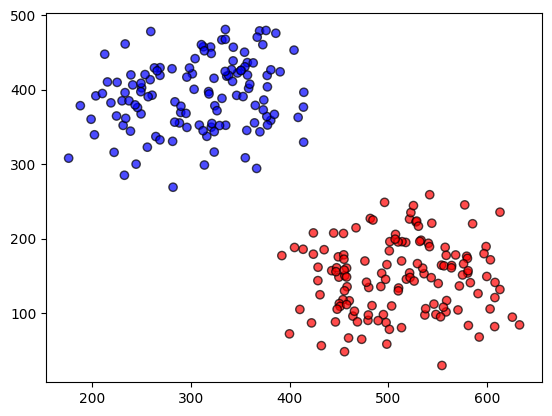

In [29]:
plt.scatter(dados['x'],dados['y'],c=d,cmap="bwr", alpha=0.7, edgecolor="k")
plt.show()

### Ajustando os dados para o treinamento

#### Obtendo a matriz x

In [30]:
x=np.array([dados['x'],dados['y']])

#### Adicionando o limiar na matriz x

In [31]:
limiar = np.ones((1, x.shape[1]))
x = np.vstack((x, limiar))

# Perceptron

In [32]:
def Perceptron(P,x,d,eta):
    epocas = 0
    u = np.dot(P,x)
    y = np.where(u>=0.0,1.0,0.0)
    while np.array_equal(y,d)==False:
        epocas = epocas + 1
        diferenca_saida = d-y
        P += eta*(np.dot(diferenca_saida,x.T))
        u = np.dot(P,x)
        y = np.where(u>=0.0,1.0,0.0)
        #print(f'Época {epocas}')
        #print(f'Na epoca {epocas}, a matriz dos Pesos é {P}')
    print("PERCEPTRON\n")
    print('A matriz dos pesos completamente treinada é:\n',P)
    print('Número de épocas:',epocas)

### Criando a matriz de pesos sinápticos inciais aleatórios

In [33]:
P = np.random.rand(1,len(x))
print(P)

[[0.46009173 0.33343182 0.45180448]]


### Treinando o Perceptron

In [34]:
Perceptron(P,x,d,0.001)

PERCEPTRON

A matriz dos pesos completamente treinada é:
 [[ 22.40064713 -37.08967758   0.43780448]]
Número de épocas: 3


### Visualizando a reta obtida com este treinamento

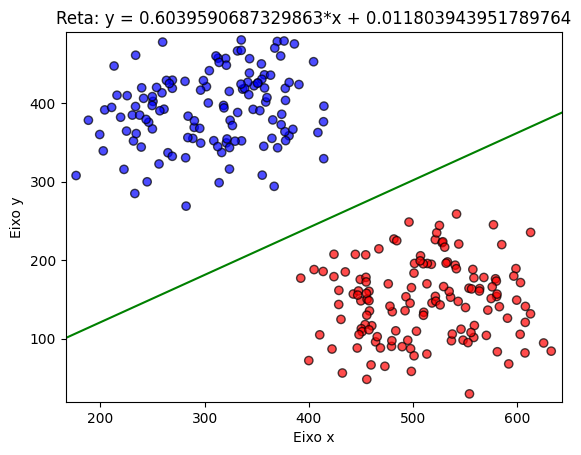

In [35]:
plt.scatter(dados['x'],dados['y'],c=d,cmap="bwr", alpha=0.7, edgecolor="k")

x_reta = np.linspace(-10, 800, 100) 
y_reta = -(P[0][0]/P[0][1]) * x_reta +(-P[0][2]/P[0][1]) 

xmin, xmax = x[0,:].min() - 10, x[0,:].max() + 10
ymin, ymax = x[1,:].min() - 10, x[1,:].max() + 10
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.plot(x_reta, y_reta, color='green', label=f'Reta: y = {-P[0][0]/P[0][1]}x + {-P[0][2]/P[0][1]}')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title(f'Reta: y = {-P[0][0]/P[0][1]}*x + {-P[0][2]/P[0][1]}')

plt.show()

# Adaline

In [36]:
def Adaline(P,x,d,eta,epsilon):
    x = x.astype(float)
    d = d.astype(float)
    m=len(x[0]) #número de entradas
    u = np.dot(P,x)
    EQM_atual = np.sum(np.square(d-u))/m
    diferenca_EQM = np.inf
    epocas = 0
    while (diferenca_EQM >= epsilon) and epocas<1000:
        EQM_anterior = EQM_atual
        P += eta*np.dot((d-u),x.T)
        u = np.dot(P,x)
        epocas = epocas + 1
        EQM_atual = np.sum(np.square(d-u))/m
        diferenca_EQM = abs(EQM_anterior - EQM_atual);
        #print(f'Na epoca {epocas}, a matriz dos Pesos é {P}')
    print("ADALINE\n")
    print('A matriz dos pesos completamente treinada é:\n',P)
    print(f'Número de épocas:{epocas}\n')

## Pesos sinápticos aleatórios

In [37]:
P = np.random.rand(1,len(x))
print(P)

[[0.11608065 0.8064938  0.37657828]]


## Realizando o treinamento

In [38]:
Adaline(P,x,d,0.001,0.00000001)

ADALINE

A matriz dos pesos completamente treinada é:
 [[-1.54607107e+158 -9.60534100e+157 -3.64792784e+155]]
Número de épocas:33



C:\Users\Victor\AppData\Local\Temp\ipykernel_6768\310130262.py:14: RuntimeWarning: overflow encountered in square
  EQM_atual = np.sum(np.square(d-u))/m
C:\Users\Victor\AppData\Local\Temp\ipykernel_6768\310130262.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  diferenca_EQM = abs(EQM_anterior - EQM_atual);


## Visualizando os dados

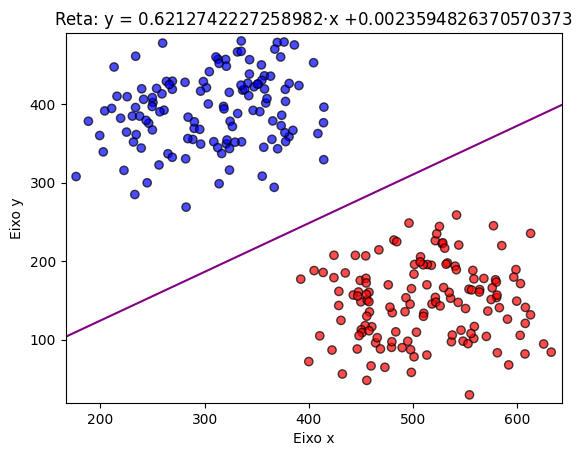

In [39]:
plt.scatter(dados['x'],dados['y'], c=d, cmap="bwr", alpha=0.7, edgecolor="k")

x_reta = np.linspace(-100, 800, 100) 

y_reta = (P[0][1]/P[0][0]) * x_reta +(-P[0][2]/P[0][0]) 

xmin, xmax = x[0,:].min() - 10, x[0,:].max() + 10
ymin, ymax = x[1,:].min() - 10, x[1,:].max() + 10
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.plot(x_reta, y_reta, color='purple', label=f'Reta: y = {-P[0][0]/P[0][1]}x + {-P[0][2]/P[0][1]}')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title(f"Reta: y = {P[0][1]/P[0][0]}$\cdot$x +{P[0][2]/P[0][0]}")


plt.show()

# Perceptron Multicamadas (PMC)

## Importando as bibliotecas

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Definindo os parâmetros

In [41]:
pmc = MLPRegressor(hidden_layer_sizes=(10),  #uma camada escondida com 2 neurônios
                    activation='tanh',      #função de ativação
                    solver='sgd',           #Define o modo que o gradiente das funções serão utilizados para atualização dos pesos sinápticos
                    batch_size=len(x),      #Define o bloco de treinamento do tamanho da matriz de amostras
                    random_state=28,        #Define a semente aleatória para inicialização dos pesos sinápticos
                    max_iter=20000          #Define o número máximo de iterações
                   )   

## Ajustando as entradas

In [42]:
x = np.array([dados['x'],dados['y']]).T
d = letras.apply(trocando_identificadores).values

## Treinando o PMC (Regressão)

In [43]:
# Treinando a rede
pmc.fit(x, d)

# Testando a rede com as amostras
t = pmc.predict(x)

#Arredondando as saídas para valores inteiros
y=t.round()

#Apresentando as saídas calculadas pela rede
#print("Saídas calculadas:", y)

# Avaliando os acertos da rede
acuracia = accuracy_score(d, y)

#Apresentando a acurácia
print(f"Acurácia:{acuracia*100}%")

Acurácia:100.0%


##### Código para gerar a visualização do PMC

In [44]:
#Código para gerar os gráficos
def grafico_dispersao_pmc(entrada, y, clf, titulo):

    x_min, x_max = entrada[:, 0].min() - 10, entrada[:, 0].max() + 10
    y_min, y_max = entrada[:, 1].min() - 10, entrada[:, 1].max() + 10

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)
         
    contour = plt.contourf(xx, yy, Z, alpha=0.3)

    cbar = plt.colorbar(contour)
    cbar.set_label("Saída associada", fontsize=12)
    
    plt.scatter(entrada[:, 0], entrada[:, 1], c=y, marker='o', cmap='bwr', edgecolors='k')

    plt.xlabel(f"$x_1$", fontsize=14)
    plt.ylabel(f"$x_2$", fontsize=14)
    plt.title(titulo, fontsize=14)

    #plt.savefig(titulo + ".pdf")
    plt.show()

#### Visualizando a regressão do PMC

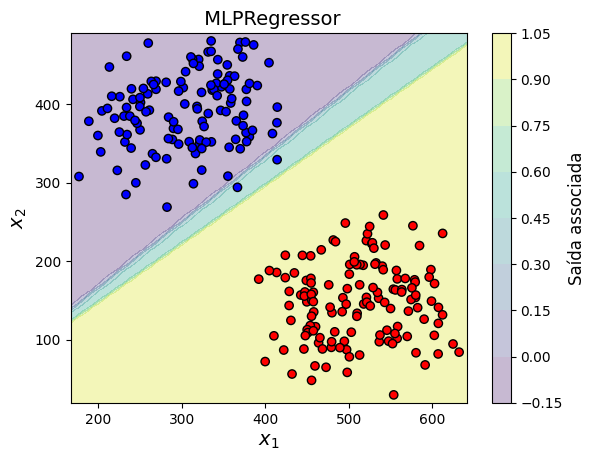

In [45]:
grafico_dispersao_pmc(x, y, pmc, " MLPRegressor")

## Treinando o PMC (Classificação)

In [46]:
pmc = MLPClassifier(hidden_layer_sizes=(10), #uma camada escondida com 2 neurônios
                    activation='tanh',      #função de ativação
                    solver='sgd',           #Define o modo que o gradiente das funções serão utilizados para atualização dos pesos sinápticos
                    batch_size=len(x),      #Define o bloco de treinamento do tamanho da matriz de amostras
                    random_state=4,         #Define a semente aleatória para inicialização dos pesos sinápticos
                    max_iter=20000          #Define o número máximo de iterações
                   ) 

In [47]:
# Treinando a rede
pmc.fit(x, d)
# Testando a rede com as amostras
y = pmc.predict(x)

#print("Saídas calculadas:", y)

# Avaliando os acertos da rede
accuracy = accuracy_score(d, y)
print(f"Acurácia:{accuracy*100}%")

Acurácia:100.0%


### Visualizando a categorização

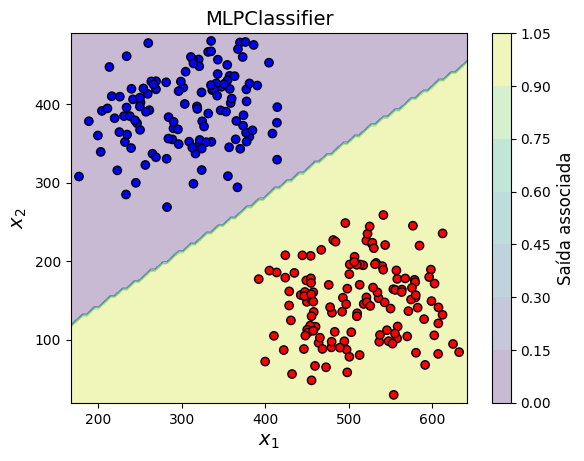

In [48]:
grafico_dispersao_pmc(x, y, pmc, "MLPClassifier")

## Teste do PMC com o "make_circles"

#### Importando da biblioteca e gerando os dados

In [49]:
from sklearn.datasets import make_circles

x, d = make_circles(
    n_samples=300,    # número total de pontos
    noise=0.1,         # ruído
    factor=0.5,        # relação entre raio interno e externo
    random_state=0
)

#### Visualizando os dados gerados

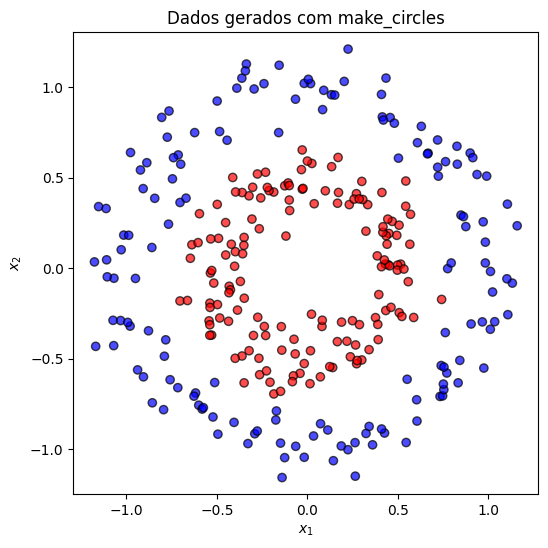

In [50]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1], c=d, cmap="bwr", alpha=0.7, edgecolor="k")

plt.title("Dados gerados com make_circles")
plt.xlabel(f"$x_1$")
plt.ylabel(f"$x_2$")
plt.axis("equal")
plt.show()

#### Realizando o treinamento

In [51]:
# Criar e treinar um pmc simples
pmc = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=2000, random_state=0)
pmc.fit(x, d)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0)

#### Visualizando os resultados do treinamento

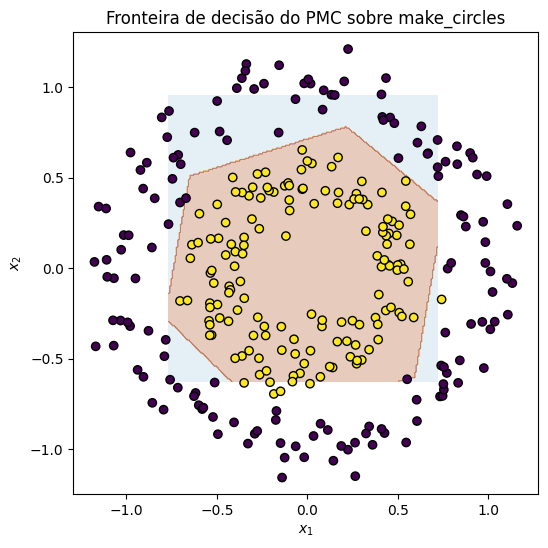

In [52]:
# Criar uma grade de pontos para testar no espaço
xx, yy = np.meshgrid(
    np.linspace(x[0,:].min()-0.5, x[0,:].max()+0.5, 200),
    np.linspace(x[1,:].min()-0.5, x[1,:].max()+0.5, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
zz = pmc.predict(grid)
zz = zz.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(x[:,0], x[:,1], c=d, edgecolors='k')
plt.title("Fronteira de decisão do PMC sobre make_circles")
plt.xlabel(f"$x_1$")
plt.ylabel(f"$x_2$")
plt.axis("equal")
plt.show()